## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

## <b>Задание:</b>

### <a class="anchor" id="1"></a> Загрузка данных. Предобработка

1. Загрузите файл <code>unemployed.csv</code> с разделителем <code>;</code>
2. Определите размер датасета.
3. Познакомьтесь с данными.
4. Проверьте пропуски, дубликаты и типы данных.
5. Добавьте столбцы с месяцем и годом (year, month).
6. Сформулируйте выводы.

In [2]:
#загрузка файла
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('unemployed.csv', sep=';')
df.head(3)

C:\Users\victo\AppData\Local\Temp\ipykernel_17132\3623110984.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('unemployed.csv', sep=';')


,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1


In [3]:
#размер датасета
print ('Число строк:', df.shape[0], '\n''Число столбцов:', df.shape[1])

Число строк: 4347416 
Число столбцов: 12


In [4]:
#Познакомьтесь с данными
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   district           object
 2   region             object
 3   month_application  object
 4   changed_value      bool  
 5   age                object
 6   gender             object
 7   education          object
 8   hc_repeat          bool  
 9   hc_didnotwork      bool  
 10  find_new_job       bool  
 11  count              int64 
dtypes: bool(4), int64(2), object(6)
memory usage: 281.9+ MB


In [5]:
#Проверьте пропуски
df.isna().sum()

id                   0
district             0
region               0
month_application    0
changed_value        0
age                  0
gender               0
education            0
hc_repeat            0
hc_didnotwork        0
find_new_job         0
count                0
dtype: int64

In [6]:
#дубликаты
df.duplicated().sum()

0

In [7]:
for col in df.columns:
    print (df[col].value_counts())

1170       1
2903034    1
2902322    1
2904027    1
2903939    1
          ..
1506023    1
1506163    1
1507034    1
1505513    1
4347338    1
Name: id, Length: 4347416, dtype: int64
Приволжский федеральный округ          946955
Сибирский федеральный округ            794724
Центральный федеральный округ          609693
Уральский федеральный округ            444749
Северо-Западный федеральный округ      444634
Северо-Кавказский федеральный округ    403553
Дальневосточный федеральный округ      392469
Южный федеральный округ                310639
Name: district, dtype: int64
Свердловская область          163248
Республика Башкортостан       154864
Челябинская область           133645
Пермский край                 131718
Республика Дагестан           131493
                               ...  
Магаданская область             9083
Чукотский автономный округ      4213
Ненецкий автономный округ       3757
г. Севастополь                  3677
г. Москва                       1565
Name: region,

In [8]:
df['gender'].unique()

array([0, 1, '1', '0', 'None'], dtype=object)

In [9]:
df['gender'].replace({'1' : 1, '0' : 0}, inplace = True)
df['gender'].unique()

array([0, 1, 'None'], dtype=object)

In [10]:
df['education'].unique()

array(['4', '2', '1', '3', '6', '9', 'None', 4, 6, 3, 2, 9], dtype=object)

In [11]:
df['education'].replace({'1' : 1, '2' : 2, '3' : 3, '4' : 4, '6' : 6, '9' : 9, 'None': 0}, inplace = True)
df['education'].unique()

array([4, 2, 1, 3, 6, 9, 0], dtype=int64)

In [12]:
df['month_application'] = df['month_application'].astype("datetime64[ns]")
df.head(3)

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,34-39,1,4,True,False,True,1


In [13]:
df['month_application'] = pd.to_datetime(df['month_application']).dt.strftime('%Y-%m')
df.head(3)

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1


In [14]:
df['month'] = pd.to_datetime(df["month_application"]).dt.month
df['year'] = pd.to_datetime(df["month_application"]).dt.year
df.head(3)

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month,year
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1,1,2017
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1,1,2017
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1,1,2017


###  <a class="anchor" id="1"></a> Исследовательский анализ данных

Все отчеты в этом разделе должны быть визуализированы. Графики должны содержать названия и подписи осей. Каждый пункт сопровидите выводами.

1. Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.
2. Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.<br> 
  *2.1 Детализируйте по каждому году, визуализируйте результат. <br>
3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму. <br>
4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.<br>
   *4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.<br>
5. Осуществите категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования. <br>
6. Исследуйте безработицу в России отдельно за 2000 год (за исключением декабря 2020!). Создайте срез данных.<br>
   6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.<br>
   6.2 Определите процент трудоустройства по гендерной принадлежности<br>
   6.3 Определите число обращений в службу занятости по федеральным округам.<br>
   6.4 Определите разброс числа объявлений по регионам с помощью boxplot.<br>
   6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.<br>
   ***6.6 Определите процент трудоустройства по федеральным округам.<br>
    ***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле<br>

Задания, отмеченные символом * - для получения максимального балла по работе, рекомендуется для профиля "Математическое моделирование и анализ данных в экономике".



<b>1.Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.

In [51]:
df1 = pd.pivot_table(df, values="count",index=['month_application',"year",'month'], aggfunc="sum").reset_index()
df1

,month_application,year,month,count
0,2017-01,2017,1,155747
1,2017-02,2017,2,146347
2,2017-03,2017,3,156272
3,2017-04,2017,4,138043
4,2017-05,2017,5,148049
5,2017-06,2017,6,118358
6,2017-07,2017,7,119418
7,2017-08,2017,8,117018
8,2017-09,2017,9,120229
9,2017-10,2017,10,139510


In [33]:
print('общее количество обращений в службу занятости:', df['count'].sum())

общее количество обращений в службу занятости: 10190214


[Text(0.5, 1.0, 'Динамика числа обращений в службу занятости'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Количество обратившихся')]

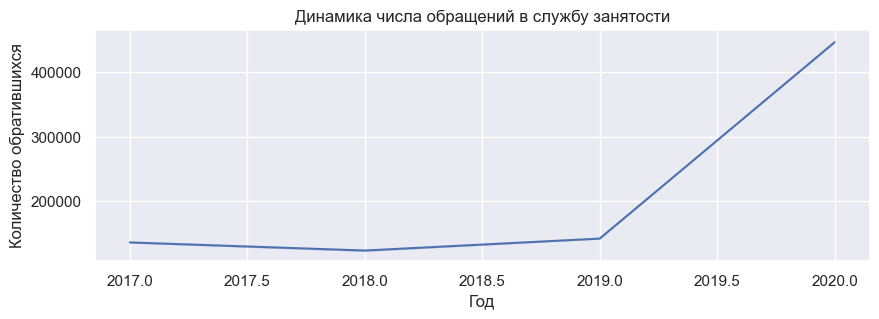

In [46]:
sns.set(rc = {'figure.figsize':(10,3)})
sns.lineplot(data=df1, x = 'year', y='count', ci=False).set(title='Динамика числа обращений в службу занятости', xlabel= 'Год', ylabel='Количество обратившихся')

<AxesSubplot:xlabel='year', ylabel='count'>

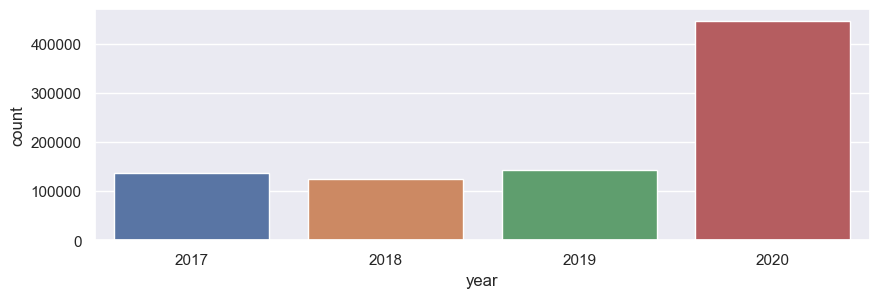

In [45]:
sns.barplot(data=df1 , x='year', y='count', ci=False)

In [52]:
#Определим признак повторных обращений в центры занятости населения
df_count2 = pd.pivot_table(df[df["hc_repeat"]==True], values="count",index=['month_application',"year",'month'], aggfunc="sum").reset_index()
df_count2

,month_application,year,month,count
0,2017-01,2017,1,81101
1,2017-02,2017,2,74314
2,2017-03,2017,3,80804
3,2017-04,2017,4,71233
4,2017-05,2017,5,85981
5,2017-06,2017,6,62629
6,2017-07,2017,7,58826
7,2017-08,2017,8,60024
8,2017-09,2017,9,60848
9,2017-10,2017,10,74367


<AxesSubplot:xlabel='year', ylabel='count'>

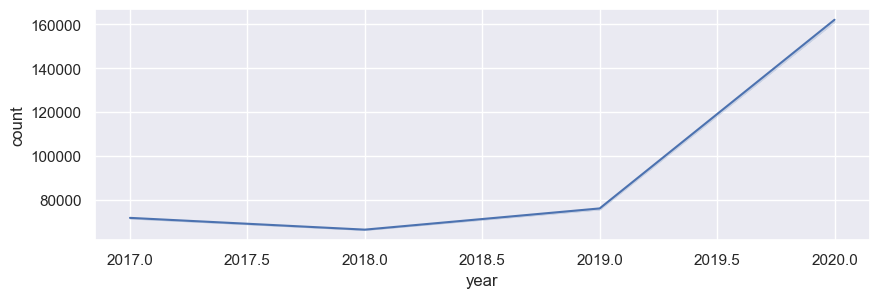

In [44]:
sns.set(rc = {'figure.figsize':(10,3)})
sns.lineplot(data=df_count2, x="year", y="count", ci=False)

[Text(0.5, 1.0, 'Динамика обращений в службу занятости'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Количество обращений')]

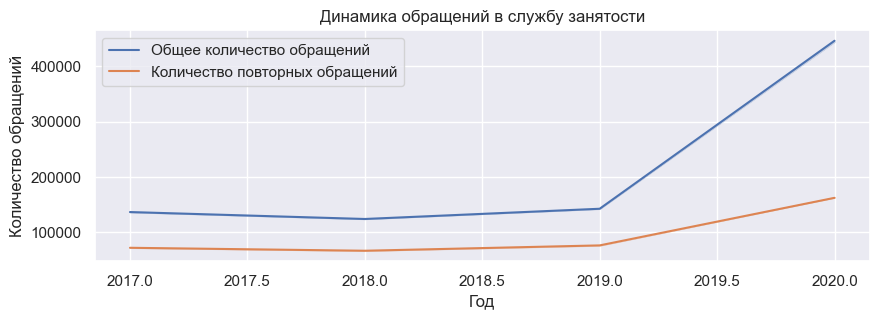

In [61]:
l=sns.lineplot(data = df1, x = 'year', y = 'count', ci=False, label = 'Общее количество обращений')
(sns.lineplot(data = df_count2, x = 'year', y = 'count', ci=False, label = 'Количество повторных обращений'))
l.set(title='Динамика обращений в службу занятости',xlabel='Год',ylabel = 'Количество обращений')

Можно сделать вывод:
1. Чаще всего в 2020 году люди обращались в службу занятости. <br>
2. Больше всего повторных обращений было в апреле 2020 года

<b> 2.Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.

In [55]:
employment = df.groupby('age')['count'].sum().reset_index()
employment

,age,count
0,16-21,642896
1,22-27,1314198
2,28-33,2001623
3,34-39,1963618
4,40-45,1580492
5,46-51,1325804
6,52-57,1066380
7,58-60,295203


<Axes: xlabel='age', ylabel='count'>

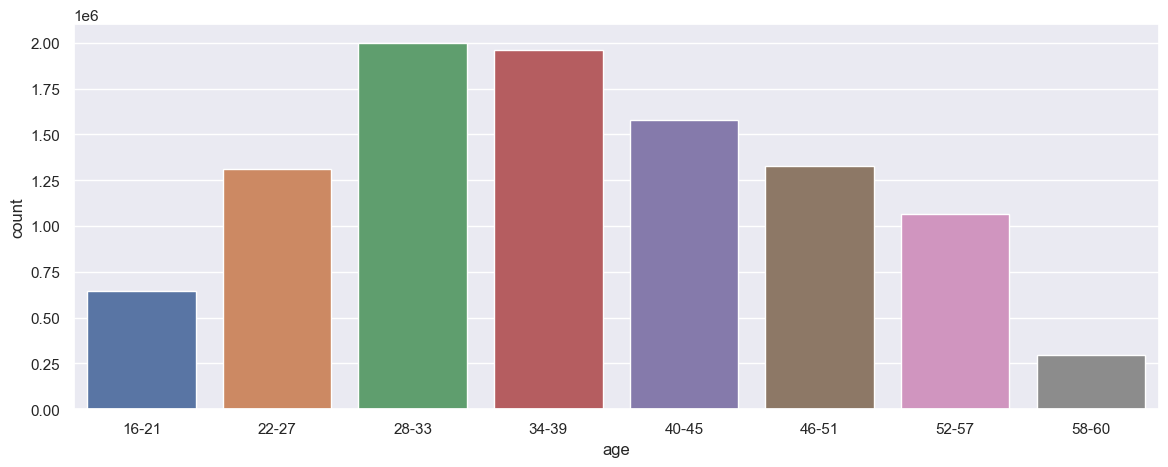

In [58]:
sns.set(rc = {'figure.figsize':(14,5)})
sns.barplot(data=employment , x='age', y='count')

In [67]:
#*2.1 Детализируйте по каждому году
employment1 = df.groupby(['age','year'])['count'].sum().reset_index()
employment1

,age,year,count
0,16-21,2017,122823
1,16-21,2018,101361
2,16-21,2019,100517
3,16-21,2020,318195
4,22-27,2017,202814
5,22-27,2018,159944
6,22-27,2019,170986
7,22-27,2020,780454
8,28-33,2017,276401
9,28-33,2018,245414


[Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Количество обращений за период'),
 Text(0.5, 1.0, 'Динамика обращений по возрастным группам')]

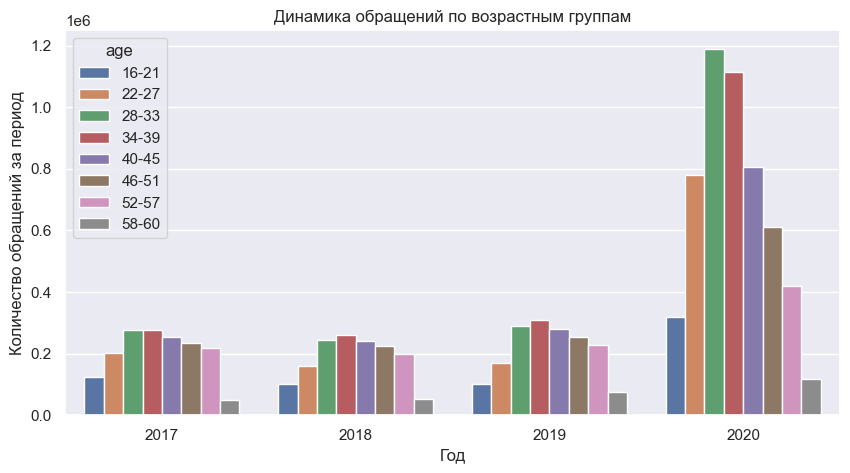

In [72]:
sns.barplot(data=employment1,x='year',y='count', hue = 'age', ci=False).set(xlabel='Год', ylabel = 'Количество обращений за период', title = 'Динамика обращений по возрастным группам')

Таким образом, наибольшее число обращений в службу занятости независимо от возраста наблюдается в 2020 году. Если же смотреть на возрастные группы, то чаще всего в службу занятости обращаюся люди в возрасте 28-33 лет.

<b> 3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.

In [73]:
#Определите общее число устроившихся на работу граждан.
find_job = df[df['find_new_job'] == True]['count'].sum()
print('Общее число устроившихся на работу граждан:', find_job)

Общее число устроившихся на работу граждан: 3576669


In [74]:
#Определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.
not_find_job = (df[df['find_new_job'] == False]['count'].sum() / df['count'].sum())*100
find_job_perc = (find_job / df['count'].sum())*100
print(not_find_job)
print(find_job_perc)

64.9009431990339
35.0990568009661


<b> 4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.<br>
    *4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.

In [81]:

find_job1 = pd.pivot_table(df, index=["year",'month','find_new_job'], values="count", aggfunc="sum").reset_index()
month = [ 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
find_job1

,year,month,find_new_job,count
0,2017,1,False,72216
1,2017,1,True,83531
2,2017,2,False,71005
3,2017,2,True,75342
4,2017,3,False,75347
...,...,...,...,...
91,2020,10,True,22461
92,2020,11,False,271423
93,2020,11,True,6008
94,2020,12,False,36503


[Text(0.5, 0, 'Год, месяц'),
 Text(0, 0.5, 'Количество нашедших работу'),
 Text(0.5, 1.0, 'Динамика числа нашедших работу по месяцам')]

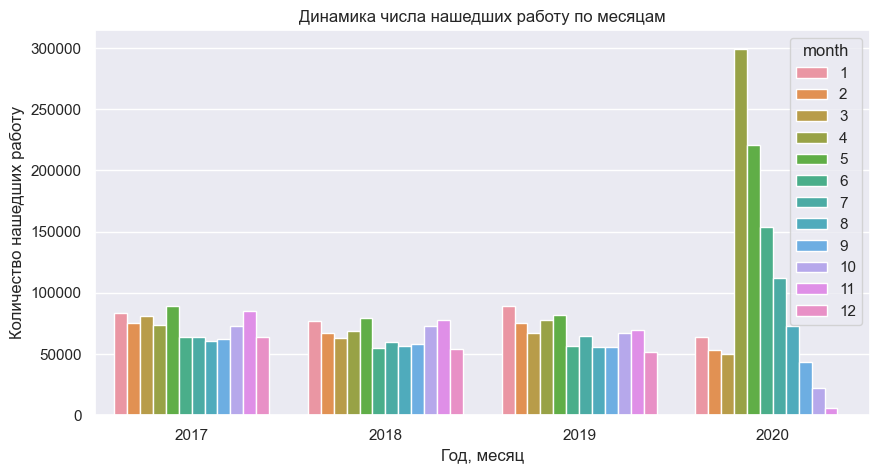

In [90]:
sns.barplot(data=find_job1[find_job1['find_new_job']==True],x='year',y='count', hue = 'month', ci=False).set(xlabel='Год, месяц', ylabel = 'Количество нашедших работу', title = 'Динамика числа нашедших работу по месяцам')

In [87]:
find = find_job1['count'].sum()
find_job2 = find_job1 [find_job1['find_new_job']==True]
find_job2['per_month'] = find_job1['count'] / find *100
find_job2

,year,month,find_new_job,count,%_per_month,per_month
1,2017,1,True,83531,0.819718,2.335441
3,2017,2,True,75342,0.739356,2.106485
5,2017,3,True,80925,0.794144,2.262580
7,2017,4,True,73932,0.725520,2.067063
9,2017,5,True,89070,0.874074,2.490306
11,2017,6,True,64218,0.630193,1.795469
13,2017,7,True,63605,0.624177,1.778331
15,2017,8,True,60830,0.596945,1.700744
17,2017,9,True,62161,0.610007,1.737958
19,2017,10,True,73158,0.717924,2.045423


[Text(0.5, 1.0, 'Динамика процента нашедших работу за соответствующий год'),
 Text(0.5, 0, 'Год, месяц'),
 Text(0, 0.5, '% людей от общего числа подавших заявление в этот год')]

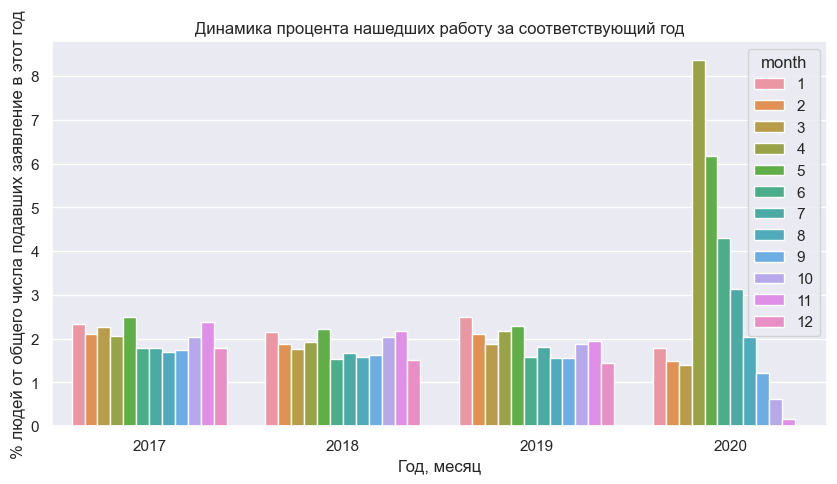

In [88]:
sns.barplot(data=find_job2, x='year', y= 'per_month', hue="month", estimator = np.sum).set(title='Динамика процента нашедших работу за соответствующий год', xlabel = 'Год, месяц', ylabel = '% людей от общего числа подавших заявление в этот год')

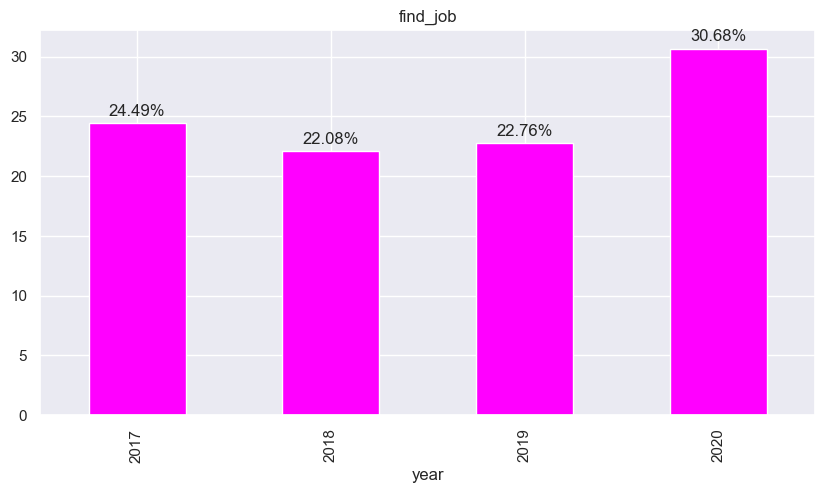

In [78]:
ax = df_job1_perc.plot(kind = 'bar',
              color = 'magenta',
              figsize = (10, 5),
              title = 'find_job',
              x = 'year',
              y = 'find__new_job')
ax.bar_label(ax.containers[0], fmt='%.2f%%',padding=3) 
plt.show()

Наибольшее количество трудоустроенных граждан наблюдается в 2020 году, а наименьшее в 2018. 

<b> 5. Осуществите категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются граждане, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования. <br>

In [98]:
group_didnotwork = df.groupby(['gender', 'education'])['hc_didnotwork'].count()
group_didnotwork

gender  education
0       0            167856
        1              2807
        2            369986
        3            449525
        4            693157
        6            431848
        9             69328
1       0            171355
        1              3954
        2            416688
        3            528168
        4            666654
        6            298540
        9             77542
None    0                 4
        3                 2
        4                 1
        6                 1
Name: hc_didnotwork, dtype: int64

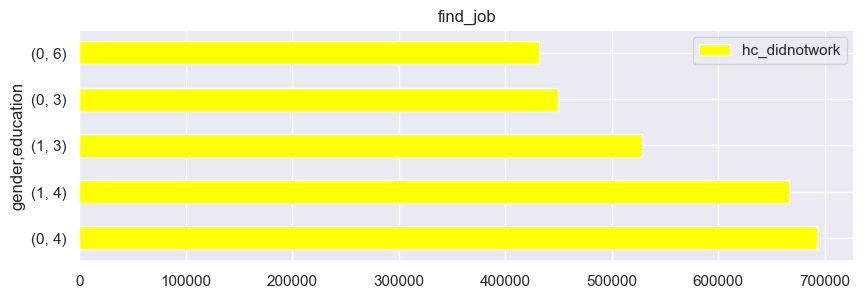

In [99]:
group_didnotwork.sort_values(ascending = False).head().plot(kind='barh',
                                                           color = 'yellow',
                                                           figsize=(10,3),
                                                           title='find_job',
                                                           legend=True,
                                                           x=['gender', 'education'],
                                                           y='hc_didnotwork')
plt.show()

Независимо от пола граждане, официально не работавшие ранне, чаще обращаются со средним профессиональным  и средним общим образованием. Это вполне логично, потому что многие после колледжа и школы сразу начинают искать себе работу.

In [81]:
#Определите соотношение трудоустройства по каждому уровню образования.
education_job = df_job.groupby('education')['count'].sum()
education_job_perc = (education_job / df_job['count'].sum())*100
education_job_perc

education
1        0.057372
2       12.314866
3       17.916726
4       28.684595
6       18.851059
9        2.119710
None    20.055672
Name: count, dtype: float64

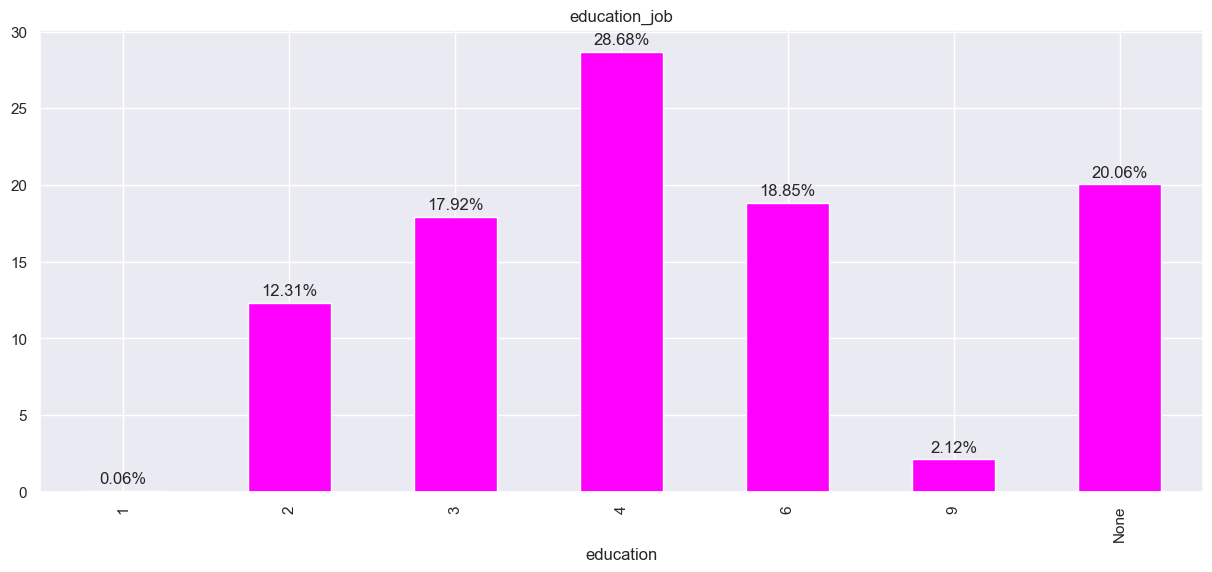

In [82]:
ax1 = education_job_perc.plot(kind = 'bar',
                              color = 'magenta',
                              figsize = (15, 6),
                              title = 'education_job',
                              x = 'education',
                              y = 'count')
ax1.bar_label(ax1.containers[0], fmt='%.2f%%',padding=3) 
plt.show()

В относительных значениях преобладает процент среднего профессионального образования и, если не брать во внимание столбец с неизвестными данными, 18.85% занимает высшее образование 

6. Исследуйте безработицу в России отдельно за 2020 год (за исключением декабря 2020!). Создайте срез данных.<br>
   6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.<br>
   6.2 Определите процент трудоустройства по гендерной принадлежности<br>
   6.3 Определите число обращений в службу занятости по федеральным округам.<br>
   6.4 Определите разброс числа объявлений по регионам с помощью boxplot.<br>
   6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.<br>
   ***6.6 Определите процент трудоустройства по федеральным округам.<br>
    ***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле<br>


In [101]:
unemployment = df[(
    df['year'] == 2020) & (df['month'] <= 11)]
unemployment

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month,year
1382,40299,Дальневосточный федеральный округ,Амурская область,2020-01,False,28-33,0,4,True,False,True,2,1,2020
1383,41202,Дальневосточный федеральный округ,Амурская область,2020-01,False,52-57,1,6,True,False,False,1,1,2020
1384,41210,Дальневосточный федеральный округ,Амурская область,2020-01,False,58-60,1,2,True,False,False,2,1,2020
1385,41240,Дальневосточный федеральный округ,Амурская область,2020-01,False,58-60,1,4,True,False,False,2,1,2020
1386,41223,Дальневосточный федеральный округ,Амурская область,2020-01,False,58-60,1,3,True,False,False,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347396,4345135,Южный федеральный округ,Ростовская область,2020-11,False,16-21,1,0,False,False,False,1,11,2020
4347397,4346476,Южный федеральный округ,Ростовская область,2020-11,False,46-51,1,0,False,False,False,8,11,2020
4347398,4346002,Южный федеральный округ,Ростовская область,2020-11,False,34-39,1,0,False,False,False,7,11,2020
4347399,4345559,Южный федеральный округ,Ростовская область,2020-11,False,28-33,0,0,False,False,False,5,11,2020


6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.

In [102]:
#6.1
unemployment_find = unemployment[unemployment['find_new_job'] == True]
unemployment_notfind = unemployment[unemployment['find_new_job'] == False]
print('Нашли работу:', unemployment_find.groupby('month')['count'].sum())
print('Не нашли работу:', unemployment_notfind.groupby('month')['count'].sum())

Нашли работу: month
1      63615
2      53040
3      49817
4     299564
5     220721
6     153530
7     112190
8      73088
9      43106
10     22461
11      6008
Name: count, dtype: int64
Не нашли работу: month
1      98098
2      96326
3     104349
4     720765
5     577112
6     622049
7     545431
8     465067
9     374197
10    349703
11    271423
Name: count, dtype: int64


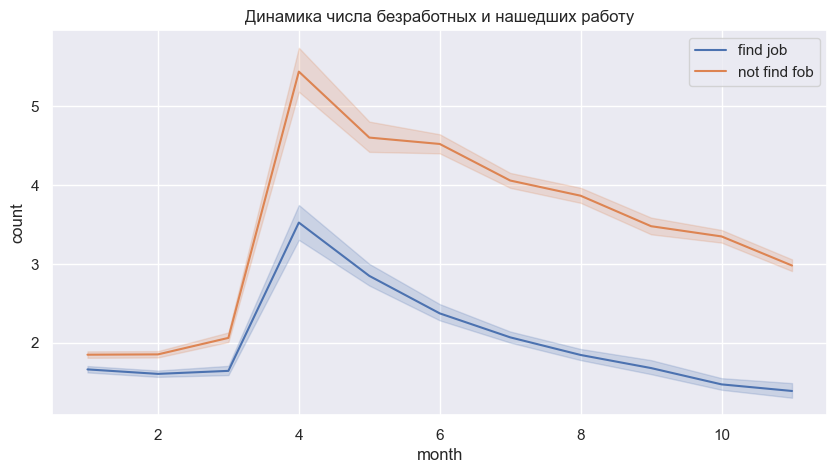

In [103]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.lineplot(data=unemployment_find, x='month', y='count', label= 'find job')
(sns.lineplot(data=unemployment_notfind, x='month', y='count', label= 'not find fob')
.set(title='Динамика числа безработных и нашедших работу', xlabel='month', ylabel='count'))

plt.show()

Оценивая динамику, можно сказать, что количество ненашедших работу намного выше, чем количество тех, кто ее нашел.

In [104]:
#6.2 Определите процент трудоустройства по гендерной принадлежности
gender_2020 = unemployment_find.groupby('gender')['count'].sum()
gender_2020_perc = (gender_2020 / unemployment_find['count'].sum())*100
gender_2020_perc

gender
0       55.100716
1       44.899192
None     0.000091
Name: count, dtype: float64

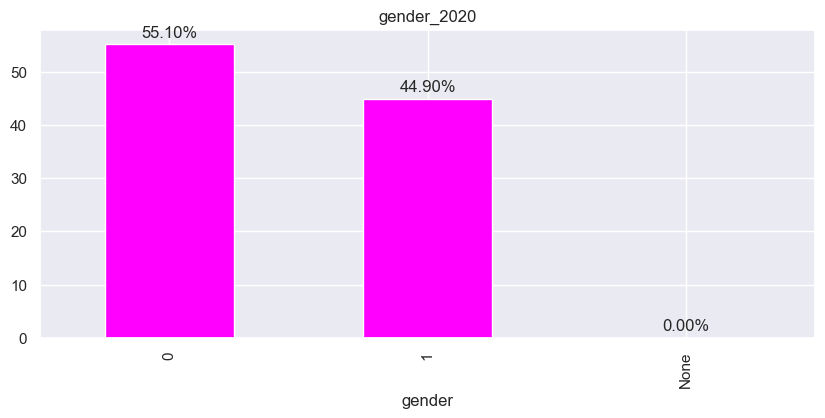

In [88]:
ax2 = gender_2020_perc.plot(kind = 'bar',
                              color = 'magenta',
                              figsize = (10, 4),
                              title = 'gender_2020',
                              x = 'gender',
                              y = 'count')
ax2.bar_label(ax2.containers[0], fmt='%.2f%%',padding=3) 
plt.show()

В 2020 году женщины чаще находили работу, нежели мужчины

In [89]:
#6.3 Определите число обращений в службу занятости по федеральным округам.
district_count = unemployment.groupby('district')['count'].sum().sort_values(ascending = False).reset_index()
district_count

,district,count
0,Приволжский федеральный округ,1048536
1,Центральный федеральный округ,1029581
2,Сибирский федеральный округ,718075
3,Северо-Кавказский федеральный округ,701329
4,Южный федеральный округ,595894
5,Северо-Западный федеральный округ,477798
6,Уральский федеральный округ,461223
7,Дальневосточный федеральный округ,289224


<Axes: xlabel='count', ylabel='district'>

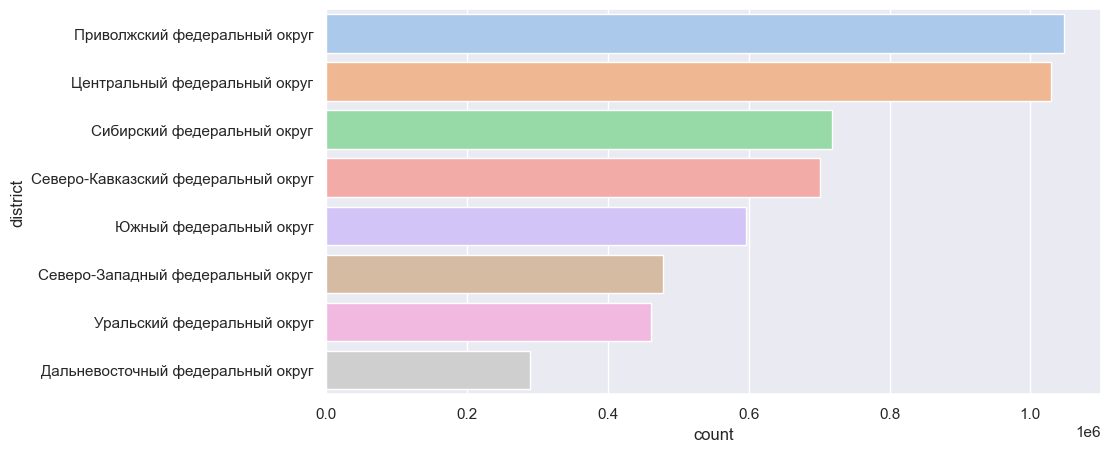

In [90]:
sns.barplot(data=district_count, x='count', y='district', palette = 'pastel')

Чаще всего в службу занятости обращались в Приволжском и Центральном федеральных округах, а меньше всего в Дальневосточном.


In [91]:
#6.4 Определите разброс числа объявлений по регионам с помощью boxplot.
unemployment1 = unemployment['district'].value_counts().sort_values(ascending=True).reset_index()
unemployment1.columns = ['district', 'count']
unemployment1

,district,count
0,Южный федеральный округ,108535
1,Дальневосточный федеральный округ,133509
2,Северо-Кавказский федеральный округ,152458
3,Уральский федеральный округ,155119
4,Северо-Западный федеральный округ,158552
5,Центральный федеральный округ,217687
6,Сибирский федеральный округ,275029
7,Приволжский федеральный округ,375499


In [92]:
grouped_data = unemployment.groupby(['district', 'region'])['count'].sum().reset_index()
grouped_data

,district,region,count
0,Дальневосточный федеральный округ,Амурская область,30967
1,Дальневосточный федеральный округ,Еврейская автономная область,6537
2,Дальневосточный федеральный округ,Забайкальский край,53401
3,Дальневосточный федеральный округ,Камчатский край,7016
4,Дальневосточный федеральный округ,Магаданская область,3554
...,...,...,...
80,Южный федеральный округ,Республика Адыгея (Адыгея),18169
81,Южный федеральный округ,Республика Калмыкия,13955
82,Южный федеральный округ,Республика Крым,71472
83,Южный федеральный округ,Ростовская область,162703


In [ ]:
#Спизженное

fig, axes = plt.subplots(4, 2, figsize=(60, 100))

for distr,i in zip(group_by['district'].unique(), axes.flat):
    b = sns.boxplot(ax=i, data=group_by[(group_by['year']==2020) & (group_by['district']==distr)], x='region', y='count', showfliers = False)
    b.axes.set_title(str(distr),fontsize=80)
    b.set_xlabel(str(distr)+', регионы',fontsize=40)
    b.set_ylabel('Количество обращений',fontsize=40)
    b.tick_params(labelsize=5)
    i.tick_params(labelrotation=80,labelsize=40)
fig.tight_layout()

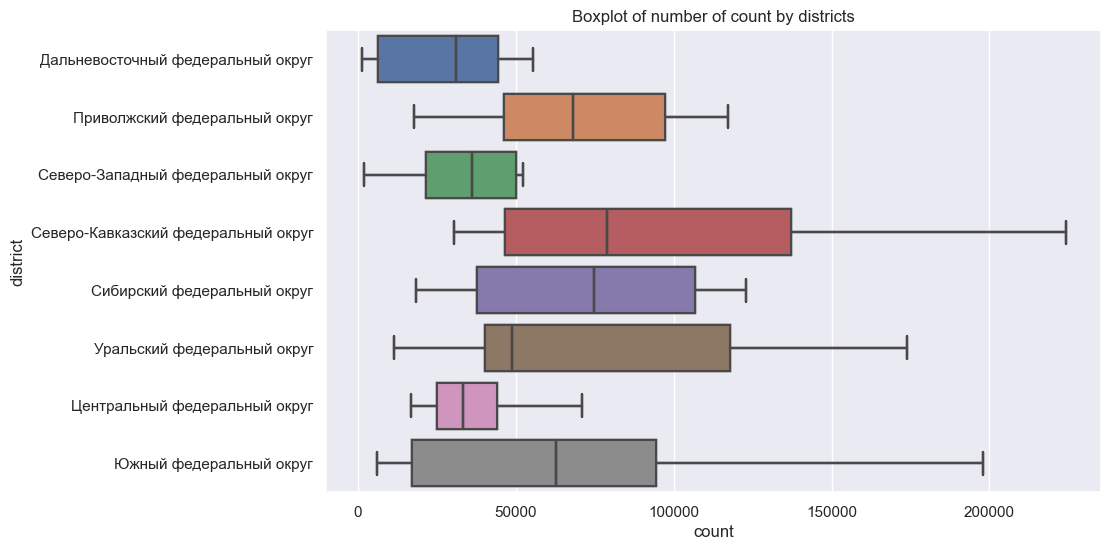

In [110]:
grouped_data = unemployment.groupby(['district', 'region'])['count'].sum().reset_index()
plt.figure(figsize=(10, 6))
for federal_district in unemployment_find['district'].unique():
    district_data = unemployment_find[unemployment_find['district'] == "федеральный округ"]
    sns.boxplot(x='count', y='district', data=grouped_data, showfliers = False)
    plt.title('Boxplot of number of count by districts')
    plt.xlabel('count')
    plt.ylabel('district')

plt.show()


In [94]:
#6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.
SZ = unemployment[unemployment['district'] == 'Северо-Западный федеральный округ']
region_SZ = SZ.groupby('region')['count'].sum().sort_values().reset_index()
region_SZ

,region,count
0,Ненецкий автономный округ,1877
1,Псковская область,17499
2,Новгородская область,20088
3,Мурманская область,23166
4,Республика Карелия,27755
5,Республика Коми,36318
6,Архангельская область,42056
7,Ленинградская область,49637
8,Вологодская область,50283
9,Калининградская область,52451


<Axes: xlabel='count', ylabel='region'>

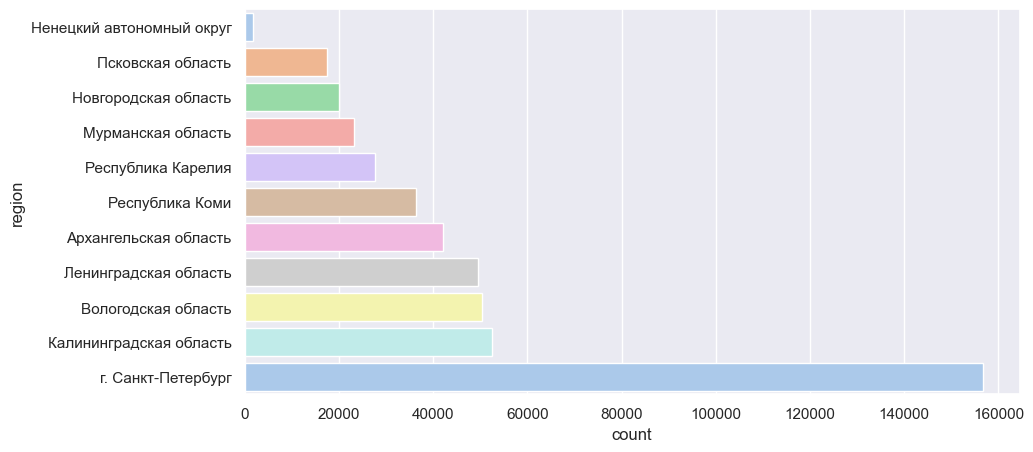

In [95]:
sns.barplot(data=region_SZ, x='count', y='region', palette = 'pastel')

Чаще всего в службу занятости Северо_Западного федерального округа обращаются в Санкт-Петербурге

In [96]:
#*6.6 Определите процент трудоустройства по федеральным округам.
district_count_perc = unemployment_find.groupby('district')['count'].sum()
district_count_perc1 = ((district_count_perc / unemployment_find['count'].sum())*100).sort_values().reset_index()
district_count_perc1

,district,count
0,Северо-Кавказский федеральный округ,3.678564
1,Дальневосточный федеральный округ,4.941849
2,Уральский федеральный округ,8.458355
3,Северо-Западный федеральный округ,9.595858
4,Южный федеральный округ,9.909127
5,Сибирский федеральный округ,16.595877
6,Приволжский федеральный округ,22.944109
7,Центральный федеральный округ,23.876260


<Axes: xlabel='count', ylabel='district'>

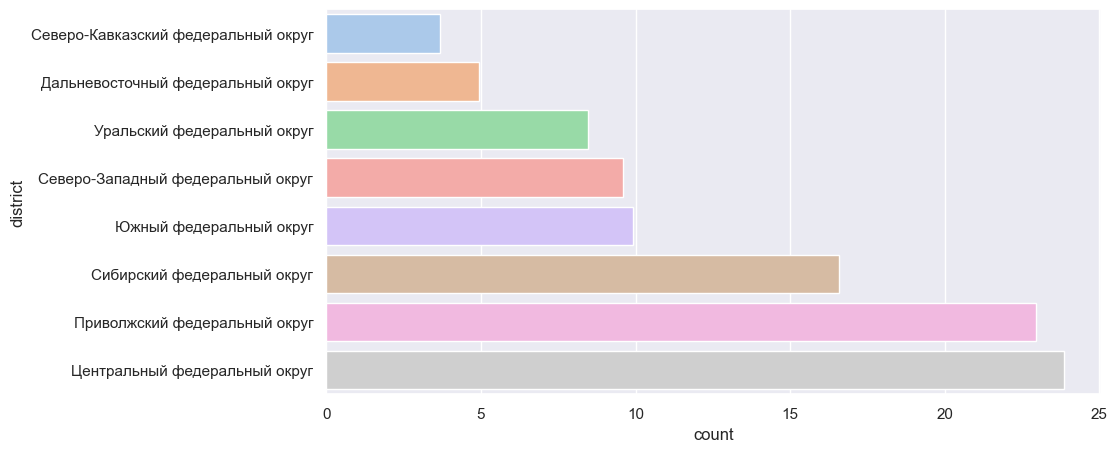

In [97]:
sns.barplot(data=district_count_perc1, x='count', y='district', palette = 'pastel')

Чаще всего на работу устраивали людей в Центральном и Приволжском федеральных округах.

In [130]:
#*6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле
for federal_district in unemployment['district'].unique():
    district_data = unemployment[(unemployment['district'] == federal_district) & (unemployment['find_new_job']==True)]
    employment_rate = (district_data['count'].sum() / df[df['year']==2020]['count'].sum() * 1000).round(2)
    print(f'{federal_district}: {employment_rate}%')

Дальневосточный федеральный округ: 10.12%
Приволжский федеральный округ: 46.98%
Северо-Западный федеральный округ: 19.65%
Северо-Кавказский федеральный округ: 7.53%
Сибирский федеральный округ: 33.98%
Уральский федеральный округ: 17.32%
Центральный федеральный округ: 48.89%
Южный федеральный округ: 20.29%
